In [1]:
import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
# from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('SMS_train.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,S. No.,Message_body,Label
416,417,Idk. I'm sitting here in a stop and shop parki...,Non-Spam
547,548,Great! How is the office today?,Non-Spam
934,935,"I'm in a meeting, call me later at",Non-Spam
555,556,You have WON a guaranteed £1000 cash or a £200...,Spam
519,520,Hmmm.still we dont have opener?,Non-Spam
...,...,...,...
561,562,Guess which pub im in? Im as happy as a pig in...,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
870,871,A guy who gets used but is too dumb to realize...,Non-Spam
841,842,There'll be a minor shindig at my place later ...,Non-Spam


In [3]:
len(set(df['Label']))

2

In [4]:
df.groupby('Label').Label.count()

Label
Non-Spam    835
Spam        122
Name: Label, dtype: int64

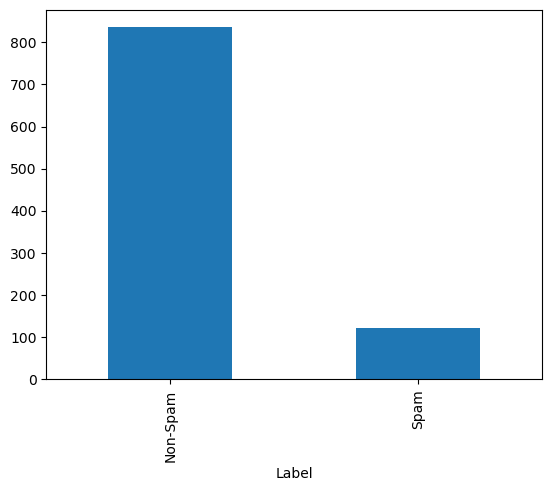

In [5]:
df.groupby('Label').Label.count().plot.bar()
plt.show()

In [6]:
regs = re.sub("[^a-zA-Z]", " ", df['Message_body'][0]).lower()
regs

'rofl  its true to its name'

In [7]:
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stemmer = PorterStemmer()
data = "I am loving messageing".split()
" ".join([stemmer.stem(i) for i in data])

'i am love messag'

In [9]:
words = stopwords.words("english")
without_stop_words_of_a_news = " ".join([i for i in regs.lower().split() if i not in words])
without_stop_words_of_a_news

'rofl true name'

In [10]:
df['cleaned'] = list(filter(lambda x: [i for i in re.sub("[^a-zA-Z]", " ", x)],df['Message_body']))
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in x.lower().split()]))
df

,S. No.,Message_body,Label,cleaned
416,417,Idk. I'm sitting here in a stop and shop parki...,Non-Spam,idk. i'm sit here in a stop and shop park lot ...
547,548,Great! How is the office today?,Non-Spam,great! how is the offic today?
934,935,"I'm in a meeting, call me later at",Non-Spam,"i'm in a meeting, call me later at"
555,556,You have WON a guaranteed £1000 cash or a £200...,Spam,you have won a guarante £1000 cash or a £2000 ...
519,520,Hmmm.still we dont have opener?,Non-Spam,hmmm.still we dont have opener?
...,...,...,...,...
561,562,Guess which pub im in? Im as happy as a pig in...,Non-Spam,guess which pub im in? im as happi as a pig in...
4,5,This is the 2nd time we have tried 2 contact u...,Spam,thi is the 2nd time we have tri 2 contact u. u...
870,871,A guy who gets used but is too dumb to realize...,Non-Spam,a guy who get use but is too dumb to realiz it.
841,842,There'll be a minor shindig at my place later ...,Non-Spam,there'l be a minor shindig at my place later t...


In [11]:
nltk.download('stopwords')
stemmer = PorterStemmer()
words = stopwords.words("english")
words.extend(['a','an','the'])
df['cleaned'] = df['cleaned'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x.lower()).split() if i not in words]).lower())
df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,S. No.,Message_body,Label,cleaned
416,417,Idk. I'm sitting here in a stop and shop parki...,Non-Spam,idk sit stop shop park lot right bawl eye beca...
547,548,Great! How is the office today?,Non-Spam,great offic today
934,935,"I'm in a meeting, call me later at",Non-Spam,meet call later
555,556,You have WON a guaranteed £1000 cash or a £200...,Spam,guarant cash prize claim yr prize call custom ...
519,520,Hmmm.still we dont have opener?,Non-Spam,hmmm still dont open
...,...,...,...,...
561,562,Guess which pub im in? Im as happy as a pig in...,Non-Spam,guess pub im im happi pig clover whatev say
4,5,This is the 2nd time we have tried 2 contact u...,Spam,thi nd time tri contact u u pound prize claim ...
870,871,A guy who gets used but is too dumb to realize...,Non-Spam,guy get use dumb realiz
841,842,There'll be a minor shindig at my place later ...,Non-Spam,l minor shindig place later tonight interest


In [12]:
df.to_csv('cleaned_news.csv')

In [13]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer(stop_words="english")
X = df['cleaned']
Y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset

# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression(random_state=1))])
model = pipeline.fit(X_train, y_train)

In [14]:
print(X_test,y_test)

265    pl ask macho much budget bb bold co saw new on...
173                                  necessarili respect
99                                                   yup
881                     alright bring see like lt gt min
433                                      sorri wa grocer
                             ...                        
410    come karnan car plea wait till pm directli got...
465    news hassl get weed week andr ha money haughai...
506                            sorri call later meet sir
741                                 go sleep tire travel
483                       sorri miss call plea call back
Name: cleaned, Length: 144, dtype: object 265    Non-Spam
173    Non-Spam
99     Non-Spam
881    Non-Spam
433    Non-Spam
         ...   
410    Non-Spam
465    Non-Spam
506    Non-Spam
741    Non-Spam
483    Non-Spam
Name: Label, Length: 144, dtype: object


In [15]:
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
print(accuracy_score(y_test,predict_news_cat))
print('\n')
print(predict_news_cat)

0.8958333333333334


['Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam'
 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam'
 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Non-Spam' 'Spam' 'Non-Spam' 'Non-Spam'
 'Non-

In [16]:
file = open('news1.txt','r')
news = file.read()
file.close()
# news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)

predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Predicted news category =  Non-Spam


In [17]:
ytest = np.array(y_test)
print(classification_report(model.predict(X_test),ytest))
print(confusion_matrix(model.predict(X_test),ytest))

              precision    recall  f1-score   support

    Non-Spam       1.00      0.89      0.94       139
        Spam       0.25      1.00      0.40         5

    accuracy                           0.90       144
   macro avg       0.62      0.95      0.67       144
weighted avg       0.97      0.90      0.92       144

[[124  15]
 [  0   5]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Non-spam','Spam']
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the text classification')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);